In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('questions.csv')

In [54]:
df.shape

(404351, 6)

In [55]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [60]:
new_df = df.sample(100000,random_state=3)

In [65]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [62]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0


In [63]:
new_df.duplicated().sum()

0

In [64]:
# remove null values
new_df.dropna(inplace=True)

is_duplicate
0    63333
1    36666
Name: count, dtype: int64
is_duplicate
0    63.333633
1    36.666367
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

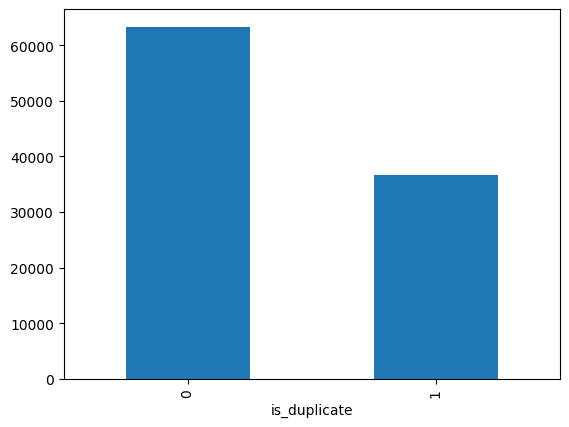

In [66]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [67]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 198384
Number of questions getting repeated 1295


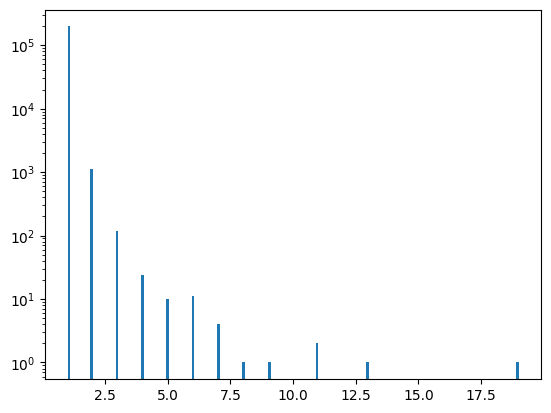

In [68]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [69]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [70]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1,46,53
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1,44,40
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0,87,57
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0,41,123
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0,94,80
...,...,...,...,...,...,...,...,...
311596,311596,611633,611634,What do Russians think about the ban of Russia...,What do Russians think about the Rio ban?,1,84,41
152965,152965,302555,302556,How do founders deal with student loans and ot...,How many Y Combinator or TechStars companies h...,0,62,98
240483,240483,473687,473688,Why do so may people ask questions on Quora th...,Why do some people use Quora when a dictionary...,1,94,79
90934,90934,180550,180551,How does it feel for a guy to fall in love?,What it is like for a guy to fall in love with...,1,43,54


In [71]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1,46,53,10,12
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1,44,40,9,8
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0,87,57,18,13
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0,41,123,6,18
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0,94,80,18,18


In [72]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [73]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1,46,53,10,12,4
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1,44,40,9,8,6
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0,87,57,18,13,3
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0,41,123,6,18,3
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0,94,80,18,18,5


In [74]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [75]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1,46,53,10,12,4,22
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1,44,40,9,8,6,17
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0,87,57,18,13,3,28
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0,41,123,6,18,3,23
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0,94,80,18,18,5,35


In [76]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
316514,316514,621099,621100,How do you decide what career is best for you?,What is the best way to find a career which su...,1,46,53,10,12,4,22,0.18
93351,93351,185328,185329,How can I improve my English in all aspects?,How can I improve my English speaking .?,1,44,40,9,8,6,17,0.35
85118,85118,169048,169049,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...,0,87,57,18,13,3,28,0.11
201278,201278,397188,397189,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...,0,41,123,6,18,3,23,0.13
323685,323685,634952,634953,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...,0,94,80,18,18,5,35,0.14


minimum characters 1
maximum characters 350
average num of characters 59


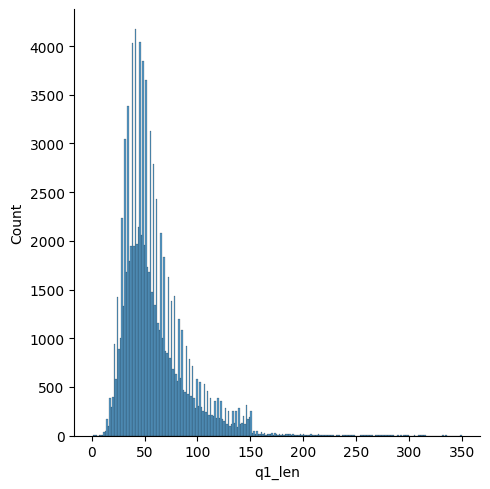

In [77]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 2
maximum characters 1169
average num of characters 60


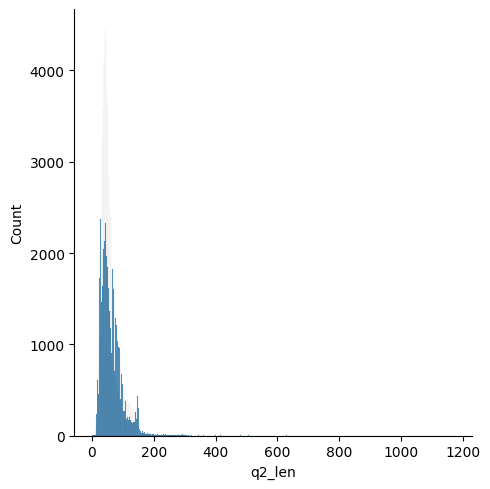

In [78]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 73
average num of words 10


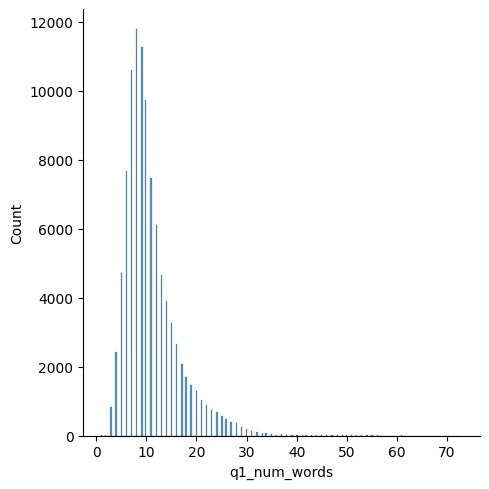

In [79]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


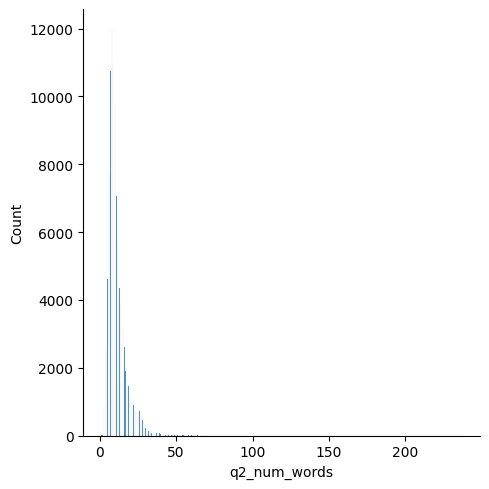

In [80]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

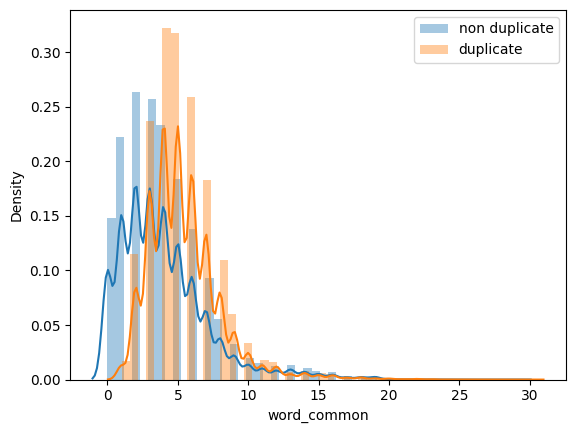

In [81]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

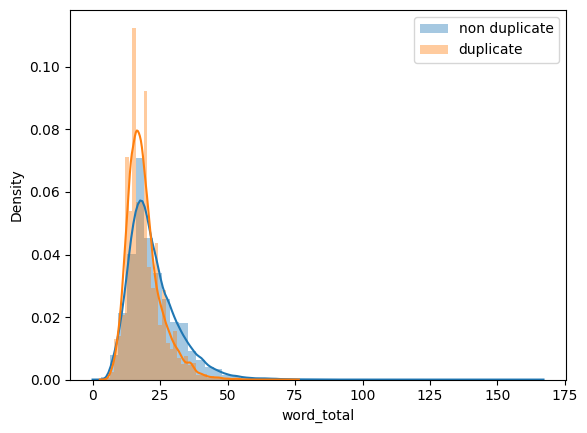

In [82]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

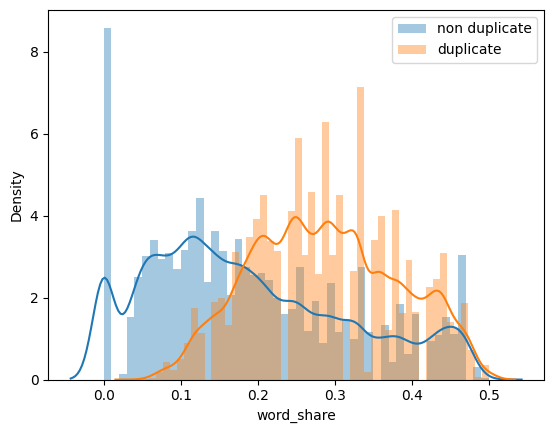

In [83]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [84]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
316514,How do you decide what career is best for you?,What is the best way to find a career which su...
93351,How can I improve my English in all aspects?,How can I improve my English speaking .?
85118,Why is it that 1 litre of water weighs 1 kg wh...,If you drink 3 liters of water would you weigh...
201278,Why didn't Native Americans make alcohol?,Why didn't the Japanese develop a deep-seated ...
323685,I have an unopened bottle of vodka in the free...,Can an open bottle of vodka get spoiled? It is...


In [85]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(99999, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
316514,1,46,53,10,12,4,22,0.18
93351,1,44,40,9,8,6,17,0.35
85118,0,87,57,18,13,3,28,0.11
201278,0,41,123,6,18,3,23,0.13
323685,0,94,80,18,18,5,35,0.14


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) #60000x3000 ki array hogi isme har row ek question ko represent karegi, and vsplit se 2 parts me split karenge so q1_arr me pehle 30000 questions ke vector honge and q2_arr me baaki 30000 questions ke vector honge

In [87]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(99999, 6000)

In [88]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(99999, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
316514,1,46,53,10,12,4,22,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
93351,1,44,40,9,8,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
85118,0,87,57,18,13,3,28,0.11,0,0,...,0,0,0,2,0,0,0,0,0,0
201278,0,41,123,6,18,3,23,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
323685,0,94,80,18,18,5,35,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7946

In [94]:
# save the model
import pickle
pickle.dump(rf, open('model1.pkl','wb'))

In [96]:
pickle.dump(cv, open('count_vectorizer.pkl', 'wb'))

In [91]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11248  1388]
 [ 2720  4644]]


In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.778

In [93]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10369  2267]
 [ 2173  5191]]


In [95]:
pickle.dump(xgb, open('model2.pkl','wb'))